In [34]:
import tweepy #https://github.com/tweepy/tweepy
import csv
import pandas as pd
# Used for progress bar
import time
import sys

#Twitter API credentials
consumer_key = "70K9Xv549k0HNty0dvTGx5Tpz"
consumer_secret = "N6zvALwa6d5LCF0VqfCuvWfOFQkqsHblU3yw2XXZUZqWZaGH4v"
access_key = "3170648335-NVnmWZTNwsFAbgrPC1lh4vJ0CA9mipLNFXvSN6x"
access_secret = "U7sqL0mKO4uypD6sI34DOZxAAgdvfCp1WJYhckoiUNneB"

OAUTH_KEYS = {'consumer_key':consumer_key, 'consumer_secret':consumer_secret,
 'access_token_key':access_key, 'access_token_secret':access_secret}
auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    
# Initialize dataframe of users that will hold the edge relationships
dfUsers = pd.DataFrame()
dfUsers['userFromName'] =[]
dfUsers['userFromId'] =[]
dfUsers['userToId'] = []
count = 0 

In [ ]:
allNames=['therealcornett','sheriffclarke', 'hardikpatel_', 'ellievan65', 'incindia', 'repadamschiff','krassenstein', 'trumperseaney', 'senschumer', 'stormisuponus','kamalaharris','harsimratbadal_', 'bjp4india', 'hardikpatel_','repcummings','govmikehuckabee','tomsteyer','sunil967','lrihendry','judicialwatch', 'rwpusa','dana1981', 'ryanafournier', 'ankitlal', 'incindia', 'lukerosiak', 'gop', 'vivekagnihotri', 'mmassalas', 'mini_707070']
nameCount = len(allNames)
# Either would work. However, many Twitter users follow fewer users than are following them, especially the most popular accounts. 
# This reduces the number of very large calls to Twitter API, which seemed to cause problems.
for name in allNames:
    # Build list of friends    
    currentFriends = []
    for page in tweepy.Cursor(api.friends_ids, screen_name=name).pages():
        currentFriends.extend(page)
    currentId = api.get_user(screen_name=name).id
    currentId = [currentId] * len(currentFriends)
    currentName = [name] * len(currentFriends)   
    dfTemp = pd.DataFrame()
    dfTemp['userFromName'] = currentName
    dfTemp['userFromId'] = currentId
    dfTemp['userToId'] = currentFriends
    dfUsers = pd.concat([dfUsers,dfTemp])
    time.sleep(70) # avoids hitting Twitter rate limit
    # Progress bar to track approximate progress
    count +=1
    per = round(count*100.0/nameCount,1)
    sys.stdout.write("\rTwitter call %s%% complete." % per)
    sys.stdout.flush()    
    


In [ ]:
# Again, to limit the number of calls to Twitter API, just do lookups on followers that connect to those in our user group.
# We are not interested in "friends" that are not part of this community.
fromId = dfUsers['userFromId'].unique()
dfChat = dfUsers[dfUsers['userToId'].apply(lambda x: x in fromId)]
print(dfChat)

# No more Twitter API lookups are necessary. Create a lookup table that we will use to get the verify the userToName
dfLookup = dfChat[['userFromName','userFromId']]
dfLookup = dfLookup.drop_duplicates()
dfLookup.columns = ['userToName','userToId']
dfCommunity = dfUsers.merge(dfLookup, on='userToId')

dfCommunity.to_csv('dfCommunity.csv',index = False,encoding='utf-8')

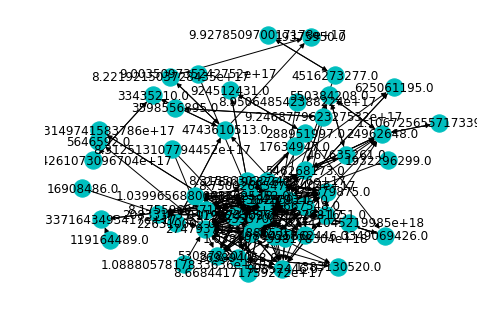

In [40]:
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
#import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('dfCommunity_2.csv')

G = nx.DiGraph()
#G = nx.Graph()
G.add_nodes_from(df['userFromId'])
#G.add_nodes_from(df['userFromName'])
#G.add_edges_from(zip(df['userFromId'],df['userToId']))

temp = zip(df['userFromId'],df['userToId'])
G.add_edges_from(temp)

dfLookup = df[['userFromName','userFromId']].drop_duplicates()
#dfLookup.head()

dfLookup
for userId in dfLookup['userFromId']:
    temp = dfLookup['userFromName'][df['userFromId']==userId]
    #print(temp.values[0])
    G.node[userId]['userName'] = temp.values[0]
    
nx.draw(G, pos=nx.spring_layout(G,k=0.8),with_labels=True,node_color='c',edge_color='k')

In [41]:
h=max(dict(G.degree).items(), key = lambda x: x[1])

In [42]:
rt_maximum=h[0]
rt_maximum=int(round(rt_maximum))
rt_maximum

886025352

In [43]:
u = api.get_user(rt_maximum)
print(u.screen_name)

DrKatrinaKeene
